# NEWS ARTICLES COLLECTION

In [2]:
pip install -r requirements.txt

  Using cached mistralai-0.1.8-py3-none-any.whl.metadata (1.8 kB)
  Using cached newspaper-0.1.0.7.tar.gz (176 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      WARNING! You are attempting to install newspaper's python2 repository on python3. PLEASE RUN `$ pip3 install newspaper3k` for python3 or `$ pip install newspaper` for python2
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from requests_html import HTMLSession, AsyncHTMLSession
import asyncio
from newspaper import Article
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

ModuleNotFoundError: No module named 'gensim'

In [ ]:
async def fetch_articles(url):
  #create a session and use it to retrieve information from the url
    session = AsyncHTMLSession()
    r = await session.get(url)
    # with .arender we render the browser in the background
    await r.html.arender(sleep=1, scrolldown=5, timeout=2000) # sleep and timeout are set to prevent some erros, scrolldown is n times we scroll the page
    articles = r.html.find("article")
    links = []  # Empty list to store links
    for item in articles:
        try:
            newsitem = item.find("a.JtKRv", first=True) #specific section were info are stored
            link = list(newsitem.absolute_links)[0]
            links.append(link)
        except:
            pass
    return links

async def main():
  # Define the url to scrape
    url = 'https://news.google.com/search?q=Chiara%20Ferragni%20Balocco&hl=it&gl=IT&ceid=IT%3Ait'
    links = await fetch_articles(url)
    for link in links:
        # Use Newspaper3k to excract;
        article = Article(link)
        article.download()
        article.parse()
        # Telling newspaper3k to exctract the title, text and links of each article and print it
        print(f"Titolo: {article.title}")
        print(f"Testo: {article.text}")
        print(f"URL: {link}\n")

# Use await directly if already in an event loop
await main()



ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error Target.detachFromTarget: Target closed.')>
pyppeteer.errors.NetworkError: Protocol error Target.detachFromTarget: Target closed.


Titolo: Fedez a 'Belve': "Il caso Balocco ha influito nella crisi con Chiara Ferragni"
Testo: È ufficiale il divorzio tra la Rai e Amadeus. È quanto è emerso da un incontro tra il conduttore e il direttore generale di Viale Mazzini, Giampaolo Rossi, che si è appena concluso. L'articolo su La Stampa
URL: https://news.google.com/articles/CBMihwFodHRwczovL3d3dy5sYXN0YW1wYS5pdC9zcGV0dGFjb2xpLzIwMjQvMDQvMDkvdmlkZW8vZmVkZXpfYV9iZWx2ZV9pbF9jYXNvX2JhbG9jY29faGFfaW5mbHVpdG9fbmVsbGFfY3Jpc2lfY29uX2NoaWFyYV9mZXJyYWduaS0xNDIwNzEzOC_SAQA?hl=it&gl=IT&ceid=IT%3Ait

Titolo: Fedez, Balocco: "La responsabilità non è di Chiara, o non tutta sua, ma di un suo manager"
Testo: 10 aprile 2024 Link Embed

https://video.repubblica.it/spettacoli-e-cultura/fedez-balocco-la-responsabilita-non-e-di-chiara-o-non-tutta-sua-ma-di-un-suo-manager/466582/467541 Copia <iframe class="rep-video-embed" src="https://video.repubblica.it/embed/spettacoli-e-cultura/fedez-balocco-la-responsabilita-non-e-di-chiara-o-non-tutta-sua-m

RuntimeError: This event loop is already running

ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=NetworkError('Protocol error (Target.sendMessageToTarget): No session with given id')>
pyppeteer.errors.NetworkError: Protocol error (Target.sendMessageToTarget): No session with given id


## Doing the same process as before but for another research, so as to gather more articles. Specifically for Pandoro Gate

In [ ]:


async def fetch_articles(url):
    session = AsyncHTMLSession()
    r = await session.get(url)
    await r.html.arender(sleep=1, scrolldown=5, timeout=2000)
    articles = r.html.find("article")
    links = []  # Lista vuota per raccogliere solo i link
    for item in articles:
        try:
            newsitem = item.find("a.JtKRv", first=True)
            link = list(newsitem.absolute_links)[0]
            links.append(link)
        except:
            pass
    return links

async def main():
    url = 'https://news.google.com/search?q=pandoro%20gate&hl=it&gl=IT&ceid=IT%3Ait'
    links = await fetch_articles(url)
    for link in links:
        # Usa Newspaper3k per estrarre il testo dell'articolo
        article = Article(link)
        article.download()
        article.parse()
        print(f"Titolo: {article.title}")
        print(f"Testo: {article.text}")
        print(f"URL: {link}\n")

# Use await directly if already in an event loop
await main()



NameError: name 'x' is not defined

## For Ferragni Balocco research (20 more results more or less)

In [ ]:


async def fetch_articles(url):
    session = AsyncHTMLSession()
    r = await session.get(url)
    await r.html.arender(sleep=1, scrolldown=5, timeout=2000)
    articles = r.html.find("article")
    links = []  # Lista vuota per raccogliere solo i link
    for item in articles:
        try:
            newsitem = item.find("a.JtKRv", first=True)
            link = list(newsitem.absolute_links)[0]
            links.append(link)
        except:
            pass
    return links

async def main():
    url = 'https://news.google.com/search?q=ferragni%20balocco&hl=it&gl=IT&ceid=IT%3Ait'
    links = await fetch_articles(url)
    for link in links:
        # Usa Newspaper3k per estrarre il testo dell'articolo
        article = Article(link)
        article.download()
        article.parse()
        print(f"Titolo: {article.title}")
        print(f"Testo: {article.text}")
        print(f"URL: {link}\n")

# Use await directly if already in an event loop
await main()



# Datasets were then merged in "news.csv" and duplicates were eliminated

In [ ]:
news = pd.read_csv("/content/drive/MyDrive/NewsArticles_df")
news

,Titolo,Testo,URL,Sentiment
0,Chiara Ferragni sbarca su Telegram ma è subito...,"Chiara Ferragni è sbarcata su Telegram, ma è s...",https://news.google.com/articles/CBMioAFodHRwc...,Negative
1,Il canale Telegram di Chiara Ferragni vieta di...,“Secondo voi dovrei aprire un canale su Telegr...,https://news.google.com/articles/CBMijQFodHRwc...,Neutral\n\nThe article is providing factual in...
2,"Caso Chiara Ferragni e Balocco, cosa è success...","Caso Chiara Ferragni e Balocco, cosa è success...",https://news.google.com/articles/CBMikgFodHRwc...,Negative
3,"Chiara Ferragni e il caso Balocco, la procura ...",Approda a Milano l’inchiesta sul caso Balocco....,https://news.google.com/articles/CBMiVmh0dHBzO...,Negative
4,"Pandoro no, beneficienza sì: le parole vietate...","Il pandoro non si può, ma nemmeno le uova di P...",https://news.google.com/articles/CBMiggFodHRwc...,Negative
...,...,...,...,...
199,"Caso Balocco, Chiara Ferragni indagata anche p...","Caso Balocco, Chiara Ferragni indagata anche p...",https://news.google.com/articles/CBMijQFodHRwc...,Negative
200,Chiara Ferragni va al contrattacco sul caso Ba...,Chiara Ferragni e Balocco contrattaccano. Tutt...,https://news.google.com/articles/CBMiZ2h0dHBzO...,Neutral\n\nThe article is reporting on a legal...
201,Caso Ferragni-Balocco: l’indagine sul pandoro ...,Milano – Sul caso Ferragni-Balocco si profila ...,https://news.google.com/articles/CBMiUmh0dHBzO...,Neutral\n\nThe article is a factual report on ...
202,Balocco spiega la differenza di prezzo sul pan...,Sono numerose le ombre del caso Ferragni Baloc...,https://news.google.com/articles/CBMiXmh0dHBzO...,Negative


In [ ]:
news = news.dropna()

# TOPIC MODELING

In [ ]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

newstexts = news['Testo'].tolist()


# Existing stopwords
stop_words = set(stopwords.words('italian'))


# Function to perform preprocessing on a single comment
def preprocess_comment(comment):
    # Tokenize the comment
    tokens = word_tokenize(comment)

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]


    tokens = [token for token in tokens if token.lower() not in stop_words and token.isalnum()]

    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Preprocess each comment
tokenized_comments = [preprocess_comment(comment) for comment in newstexts]

# Create a dictionary representation of the comments
dictionary = corpora.Dictionary(tokenized_comments)

top_n_terms = 20

# Filter out tokens that appear in less than 10 comments or more than 50% of the comments
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Convert the dictionary to a bag-of-words corpus
corpus = [dictionary.doc2bow(comment) for comment in tokenized_comments]

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=20, random_state=25)

# Compute coherence score to evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print("Coherence Score:", coherence_lda)



# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus,dictionary, R=top_n_terms)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Coherence Score: 0.651347022807521


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.153514  0.009800       1        1  39.377150
2      0.066174 -0.111518       2        1  33.764702
1      0.087340  0.101718       3        1  26.858149, topic_info=         Term        Freq       Total Category  logprob  loglift
129    Milano  186.000000  186.000000  Default  20.0000  20.0000
65     truffa  164.000000  164.000000  Default  19.0000  19.0000
0       Fedez  139.000000  139.000000  Default  18.0000  18.0000
116     Cuneo   68.000000   68.000000  Default  17.0000  17.0000
282   persone   83.000000   83.000000  Default  16.0000  16.0000
..        ...         ...         ...      ...      ...      ...
131  Preziosi   39.499451   49.354835   Topic3  -5.3973   1.0919
112  Codacons   51.427927  128.052178   Topic3  -5.1334   0.4023
359   vicenda   46.535848  101.383147   Topic3  -5.2333   0.5359
354   vendita   45.926969  110.672253   Topic3  -5.2465   0.4351
23     essere   48.115561  167.545488   Topic3  -5.2000   0.0670

[158 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
100       1  0.840300       1
100       2  0.109130       1
100       3  0.043652       1
796       3  0.956092    2019
102       1  0.746760    2022
...     ...       ...     ...
361       3  0.081939   video
363       1  0.149447    vita
363       2  0.830263    vita
363       3  0.016605    vita
722       2  0.948086  voglio

[315 rows x 3 columns], R=20, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv,4))

Num Topics = 2  has Coherence Value of 0.3684
Num Topics = 3  has Coherence Value of 0.5773
Num Topics = 4  has Coherence Value of 0.5326
Num Topics = 5  has Coherence Value of 0.5603
Num Topics = 6  has Coherence Value of 0.5323
Num Topics = 7  has Coherence Value of 0.5008
Num Topics = 8  has Coherence Value of 0.4905
Num Topics = 9  has Coherence Value of 0.5016
Num Topics = 10  has Coherence Value of 0.4959


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Word cloud for topics to visualize

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


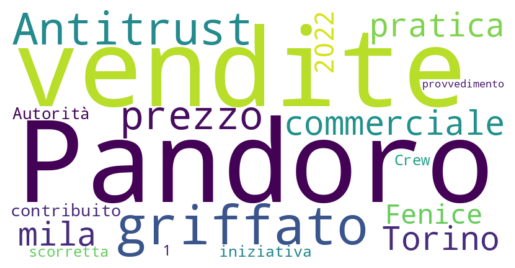

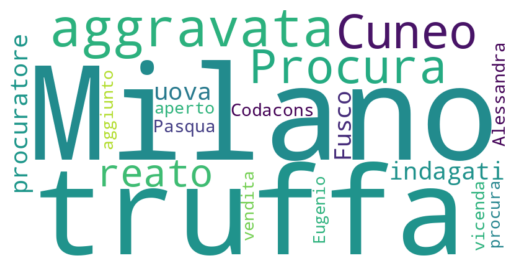

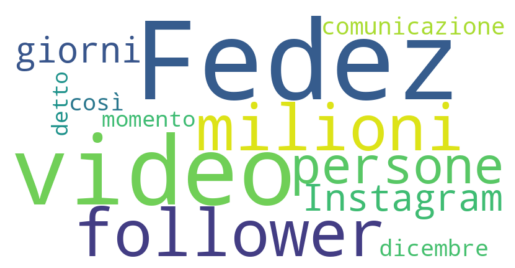

In [ ]:


# Define your additional stopwords
additional_stopwords = {'può', 'due', 'solo', 'però', 'essere', 'oltre', 'aver', 'dopo', 'fare', 'quando', 'sempre', 'molto'}

# Update the NLTK stopwords list with your additional stopwords
stop_words = set(stopwords.words('italian'))  # assuming your text is in Italian
stop_words.update(additional_stopwords)

# Function to plot word cloud for each topic
def plot_word_cloud(lda_model, num_topics, stopwords):
    for t in range(num_topics):
        plt.figure()


        # Extract the top words for each topic
        top_words = {word: value for word, value in lda_model.show_topic(t, topn=20)}

        # Filter top words to remove any additional stopwords
        filtered_words = {word: value for word, value in top_words.items() if word.lower() not in stopwords}

        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate_from_frequencies(filtered_words)

        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

# Plot word clouds for all topics with additional stopwords
plot_word_cloud(lda_model, num_topics=3, stopwords=stop_words)



## Coherence values

## Word Cloud for titles

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


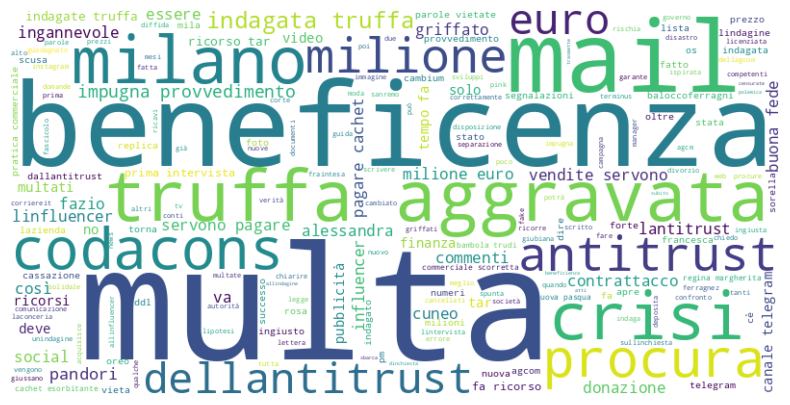

In [ ]:


# Scarica risorse NLTK necessarie
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Stop words in italiano
italian_stopwords = set(stopwords.words('italian'))

# Aggiungi altre stop words specifiche
custom_stopwords = {"Ferragni", "Pandoro Gate", "caso Balocco", "pandoro", "caso", "gate", "Chiara", "Chiara Ferragni", "Fedez", "Balocco", "pandorogate","ferragnibalocco","dopo","ecco","cosa"}
stopwords_combined = italian_stopwords.union(custom_stopwords)

# Lemmatizzatore
lemmatizer = WordNetLemmatizer()

# Preprocessing del testo
def preprocess_text(text):
    # Converti il testo in minuscolo
    text = text.lower()
    # Rimuovi la punteggiatura
    text = re.sub(r'[^\w\s]', '', text)
    # Lemmatizza ogni parola
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords_combined]
    return ' '.join(lemmatized_words)



# Consideriamo 'text' come il tuo testo preprocessato
# Calcolo delle frequenze delle parole
words = text.split()
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Filtriamo le parole per mantenere solo quelle con frequenza superiore a una certa soglia
min_frequency = 3  # Soglia di frequenza minima
filtered_words = {word: freq for word, freq in word_freq.items() if freq >= min_frequency}

# Genera il word cloud con un numero massimo di parole
max_words = 50

# Preprocessa e genera il word cloud
preprocessed_text = preprocess_text(text)
wordcloud = WordCloud(stopwords=stopwords_combined, background_color="white", width=800, height=400).generate(preprocessed_text)

# Visualizza il word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
